# Campaña de Marketing Bancario (Solucion)

## Paso 1: Carga del conjunto de datos

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Paso 2: Realiza un EDA completo


#### Exploracion y limpieza de datos

In [2]:
# Obtener dimensiones
total_data.shape

(41188, 21)

Se observa que el DataFrame contiene 41188 registros (cantidad de filas) y 21 variables (cantidad de columnas).

In [4]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
#valores no nulos
total_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

De la información anterior, vemos que no tenemos registros NaN y tampoco tenems valores nulos

En cuanto a tipos de datos, tenemos:

- 11 Variables con caracteristicas categoricas ( `contact, day_of_week, default, education, housing,job, loan, marital, month, poutcome, y`)
    
- 10 Variables con caracteristicas numericas (`age, campaign,  cons.conf.idx, cons.price.idx,  duration, emp.var.rate, euribor3m, nr.employed, pdays, previous`)

#### Analisis de variables univariadas

##### Para las variables categoricas

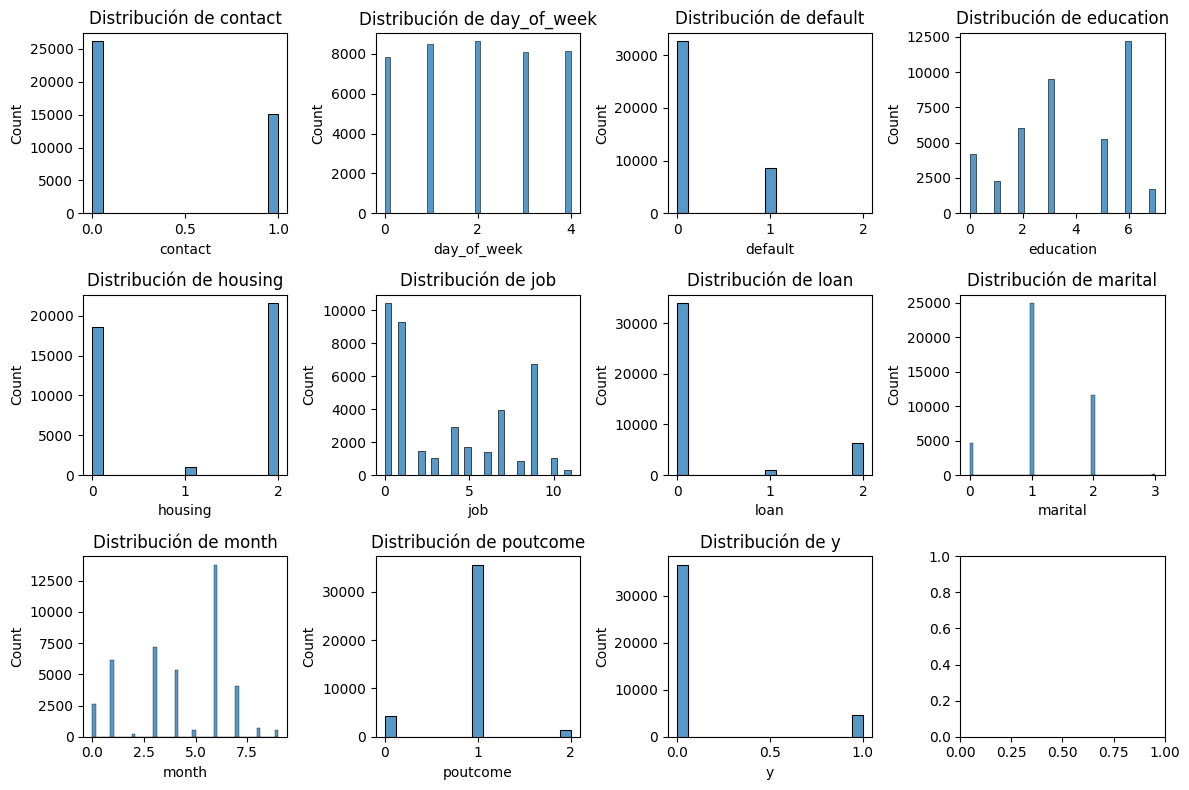

In [18]:
# Definir variables categóricas y transformarlas
categorical_vars = ["contact", "day_of_week", "default", "education", "housing", "job", "loan", "marital", "month", "poutcome", "y"]

# Transformar variables categóricas a numéricas
for col in categorical_vars:
    if total_data[col].dtype == 'object':
        total_data[col] = pd.Categorical(total_data[col]).codes

# Crear la figura y los subplots
fig, axs = plt.subplots(3, 4, figsize=(12, 8))
axs = axs.flatten()  # Aplanar el array de ejes para facilitar el acceso

# Crear los histogramas y establecer títulos
for i, col in enumerate(categorical_vars):
    sns.histplot(data=total_data, x=col, ax=axs[i])
    axs[i].set_title(f"Distribución de {col}")

# Ajuste del diseño y mostrar la figura
plt.tight_layout()
plt.show()

Podemos observar lo siguiente en el histograma:

* Tipo de comunicación de la variable contacto (`contact`) las categoria 0 es mayor a la categoria 1.
* Todos los clientes han sido contactado de forma similar (`day_of_week`).
* La mayoria de los clientes no tiene crédito actualmente (categoria 0).
* El nivel de educacion de los clientes (`education`) prevalencen la categoria 6 seguida de la categoria 3.

* Respecto a los prestamos de vivienda (`housing`) las categorias 2 y 0 son representativas y similares resepcto a la categoria 1 que tiene poca presencia.

* Respecto al tipo de trabajo (`job`), la categoria 0, 1 son las que destacan seguidas a las categorias 9 y 7.

* Respecto a los prestamos personales (`loan`), descata la categoria 0.
* Respecto al estado civil (`marital`), destacan las categorias 1 y 2.
* El mes en donde se han contactados los clientes (`month`) con mayor frecuencia ha sido el mes de julio (categoria 6).

* Resultado de la campaña de marketing anterior (`poutcome`) realizada destaca la categoria 1.

* TARGET (El cliente contrata un depósito a largo plazo o no), destaca la categoria 0. 

#### Analisis de variables numericas.

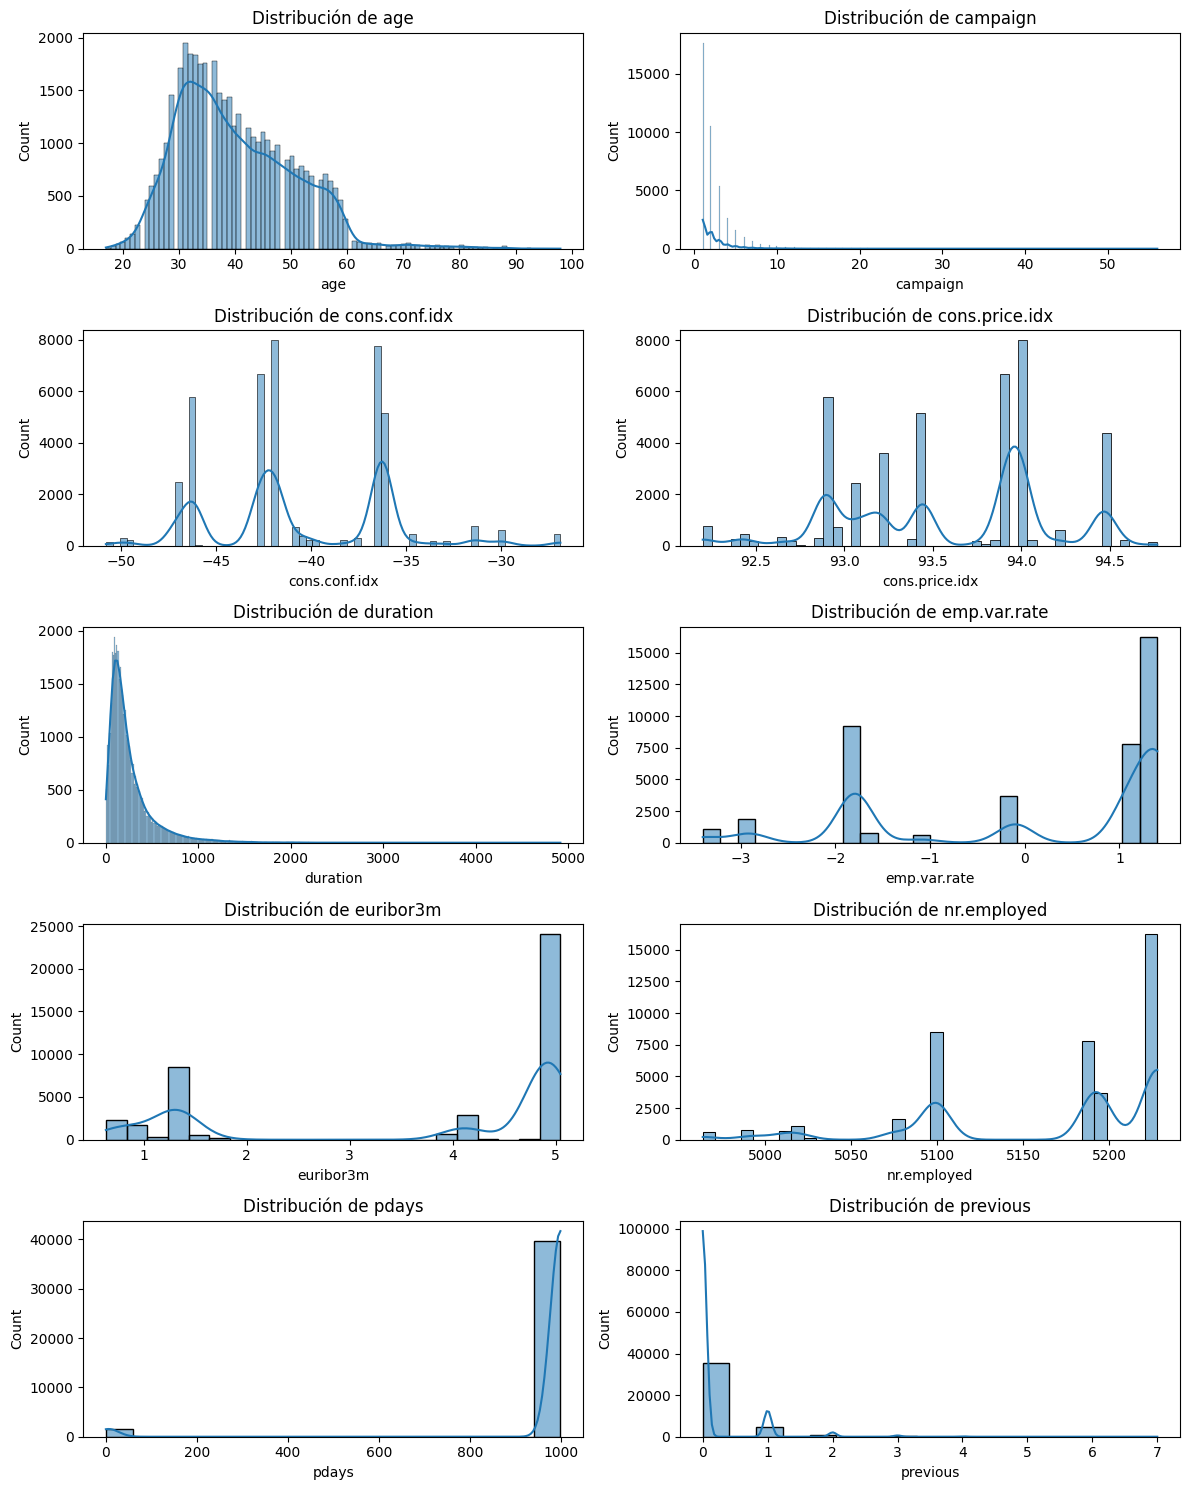

In [19]:
# Seleccionamos las variables numéricas
numeric_vars = ['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'duration', 'emp.var.rate', 'euribor3m', 'nr.employed', 'pdays', 'previous']

# Crear la figura y los subplots
fig, axs = plt.subplots(5, 2, figsize=(12, 15))
axs = axs.flatten()

# Crear los histogramas
for i, var in enumerate(numeric_vars):
    sns.histplot(data=total_data, x=var, ax=axs[i], kde=True)
    axs[i].set_title(f"Distribución de {var}")

# Ajuste del diseño y mostrar la figura
plt.tight_layout()
plt.show()

Podemos observar lo siguiente en el histograma:

* Edad del cliente (`age`): Unimodal y posee asimetria a la derecha.
* Numero de contactos realizados durante esta campaña al cliente (`campaign`): Unimodal y posee asimetria a la derecha.

* Indice de confianza del consumidor (`cons.conf.idx`): distribucion multimodal.

* Indice de precios al consumidor (`cons.price.idx`): distribucion multimodal.

* Tasa EURIBOR 3 meses. (`euribor3m`): distribucion multimodal. 

* Numero de empleados. (`nr.employed`): distribucion multimodal.  


### Analisis de variables multivariadas

#### Analisis de variables categoricas contra categoricas

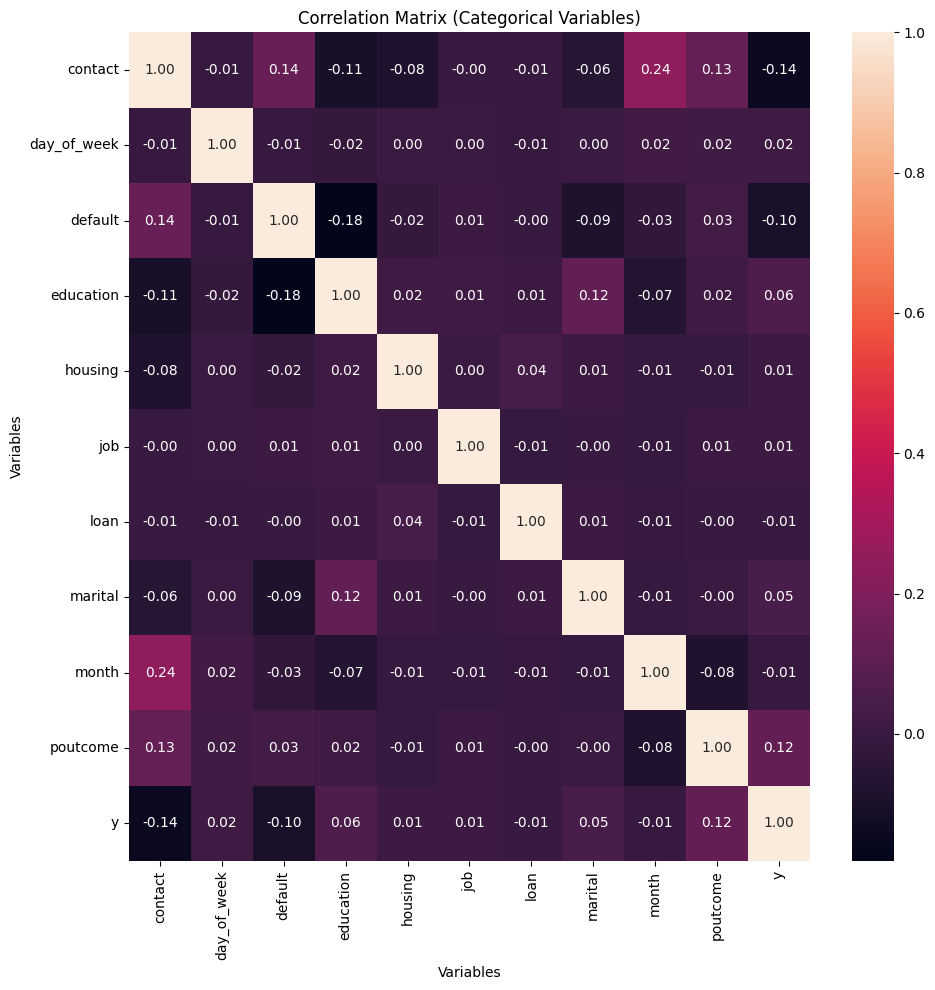

In [ ]:
# Matriz de correlacion de las variables categoricas
categorical_corr = total_data[categorical_vars].corr(method='spearman')  # Use Spearman's rank for categorical data

# Creacion del heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(categorical_corr, annot=True, fmt=".2f", ax=ax)  # Use ax for better control

# Adjuste de etiquetas
ax.set_title("Correlation Matrix (Categorical Variables)")
ax.set_xlabel("Variables")
ax.set_ylabel("Variables")

plt.tight_layout()
plt.show()

Al observar los datos aqui, hay una correlacion muy baja entre todos los datos, no podemos asumir una relacion lineal entre las variables.

#### Analisis de variables numericas contra numericas

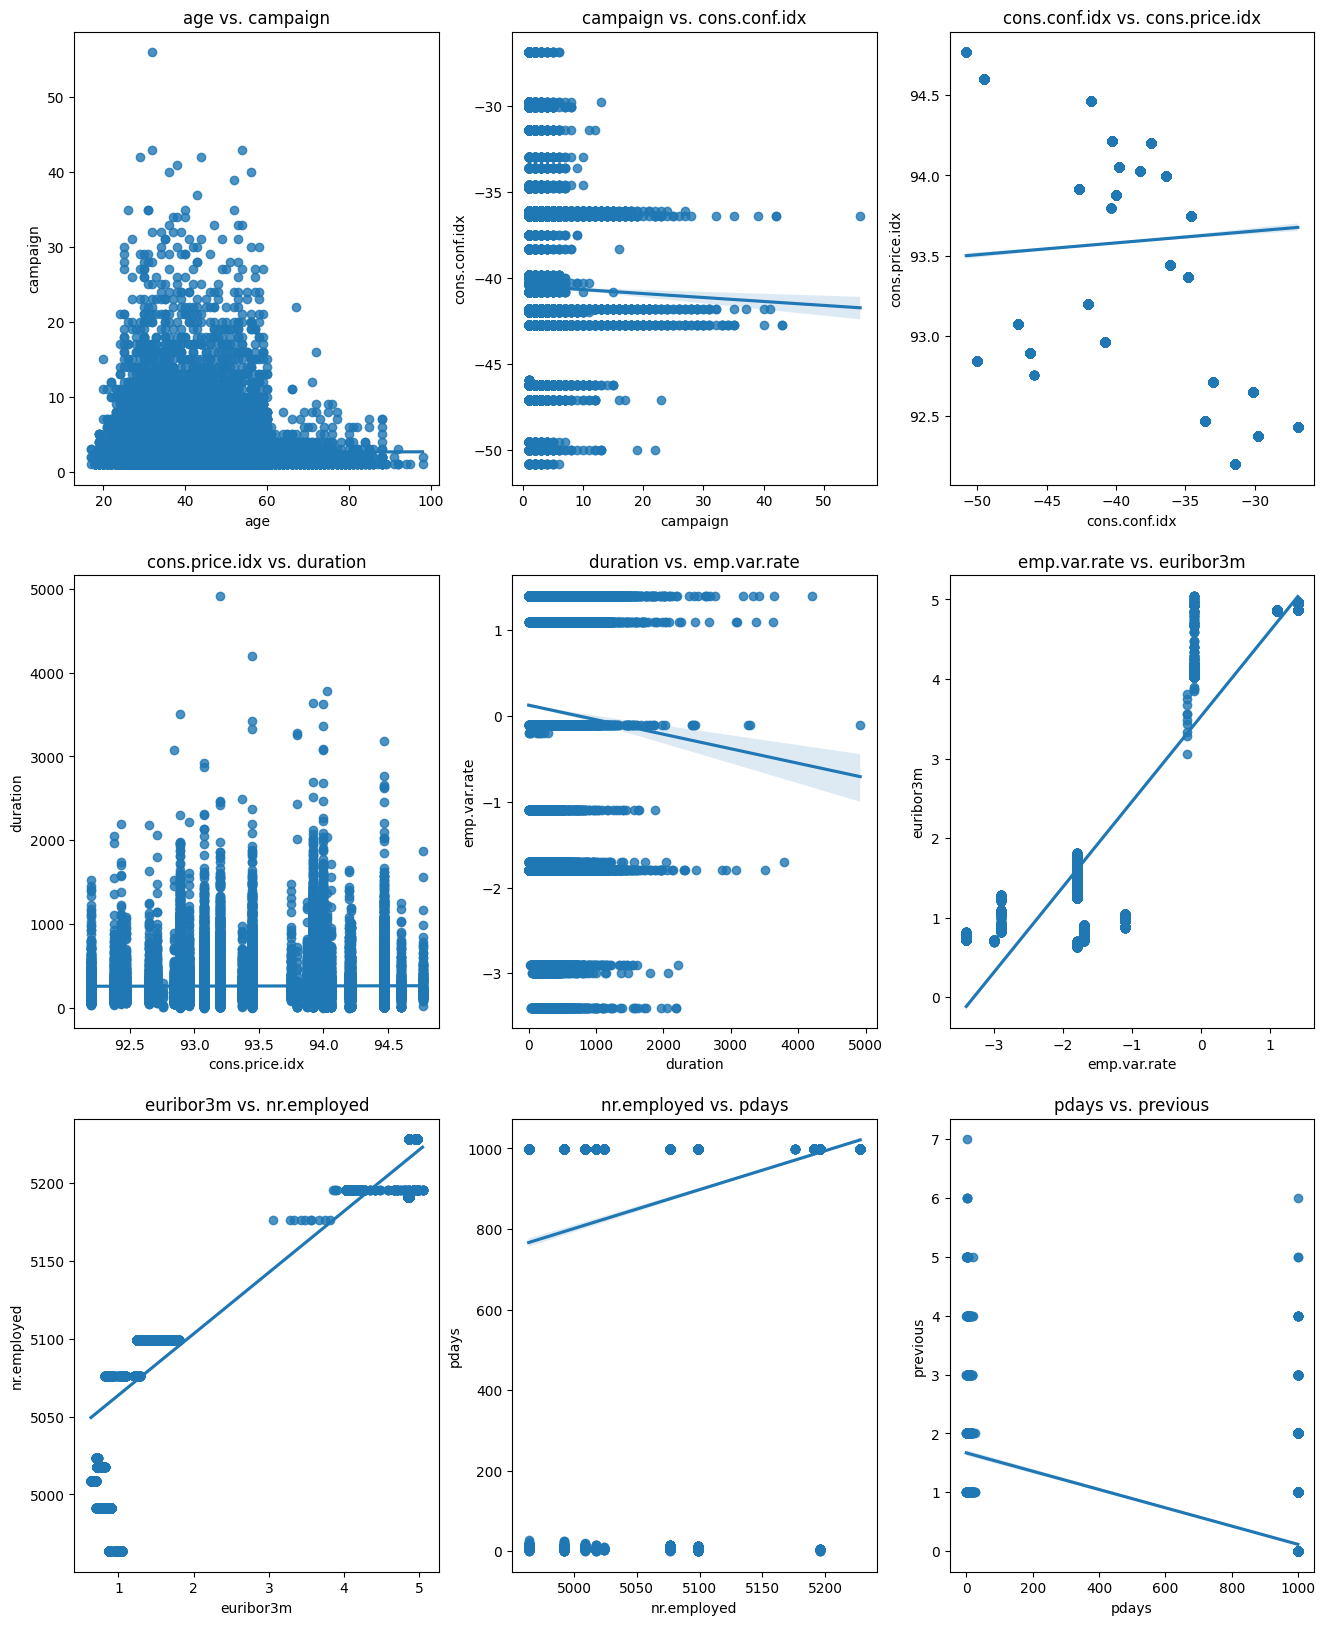

In [33]:
# Crear una subplot grid
fig, axes = plt.subplots(3, 3, figsize=(16, 20))  # Ajustar el tamaño para acomodar más gráficos
axes = axes.flatten()

# Iterar a través de los pares de variables para el análisis
var_pairs = list(zip(numeric_vars[:-1], numeric_vars[1:]))

for i, (var1, var2) in enumerate(var_pairs):
    # Crear scatterplot
    sns.regplot(ax=axes[i], data=total_data, x=var1, y=var2)
    axes[i].set_title(f"{var1} vs. {var2}")



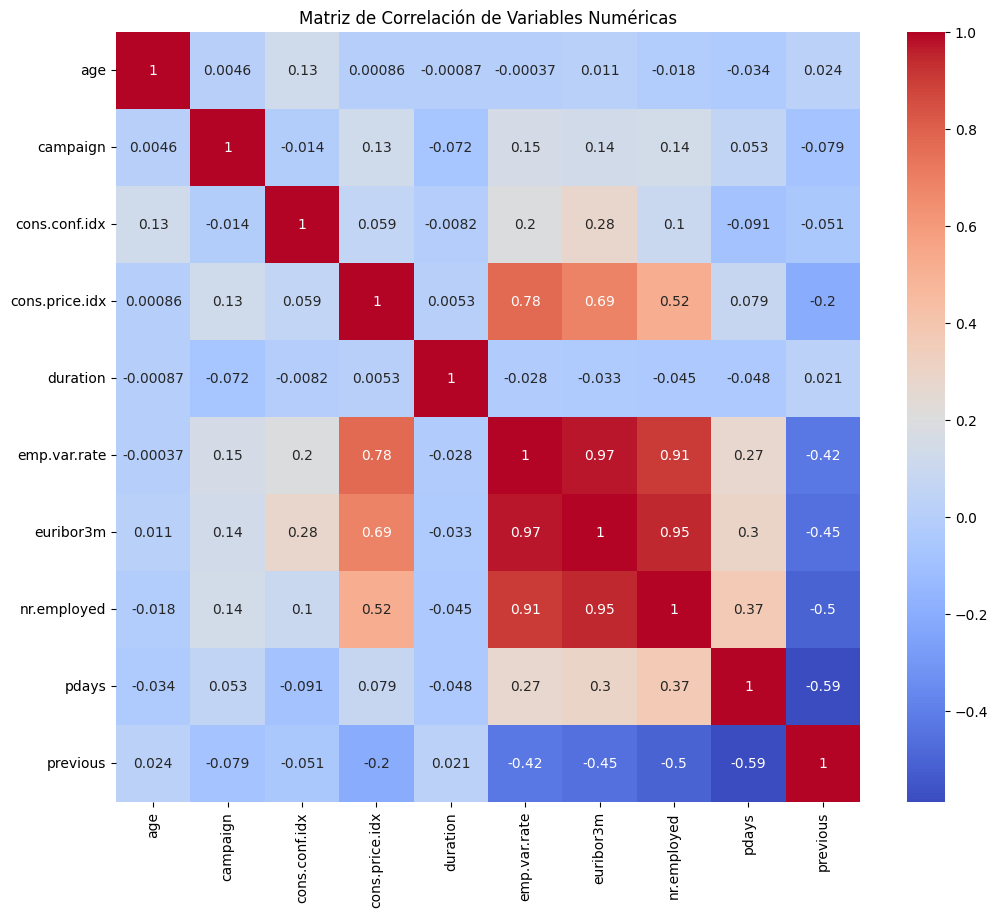

In [38]:
# Crear la matriz de correlación
corr_matrix = total_data[numeric_vars].corr()

# Crear el gráfico de calor (heatmap)
plt.figure(figsize=(12, 10))  # Ajustar el tamaño del gráfico
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

Existe una correlacion fuerte de forma proporcional entre las variables:
+ `euribor3m` y `emp.var.rate` del 0.97
+ `nr.employed` y `emp.var.rate` del 0.91
+ `emp.var.rate` y `cons.price.idex` del 0.78
+ `euribor3m` y `cons.price.idex` del 0.69

### Ingenieria de caracteristicas

In [ ]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


#### Escalamiento de datos


In [42]:
# Min-Max scaler

from sklearn.preprocessing import MinMaxScaler

total_data["job_n"] = pd.factorize(total_data["job"])[0]
total_data["marital_n"] = pd.factorize(total_data["marital"])[0]
total_data["education_n"] = pd.factorize(total_data["education"])[0]
total_data["default_n"] = pd.factorize(total_data["default"])[0]
total_data["housing_n"] = pd.factorize(total_data["housing"])[0]
total_data["loan_n"] = pd.factorize(total_data["loan"])[0]
total_data["contact_n"] = pd.factorize(total_data["contact"])[0]
total_data["month_n"] = pd.factorize(total_data["month"])[0]
total_data["day_of_week_n"] = pd.factorize(total_data["day_of_week"])[0]
total_data["poutcome_n"] = pd.factorize(total_data["poutcome"])[0]
total_data["y_n"] = pd.factorize(total_data["y"])[0]
num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
total_data_scal.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


### Seleccion de caracteristicas

In [44]:
# Seleccion de la data de prueba y data de entrenamiento

from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = total_data_scal.drop("y_n", axis = 1)
y = total_data_scal["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed
0,0.0,0.0,1.000000,0.980730,1.000000
1,0.0,0.0,0.333333,0.138291,0.512287
2,0.0,0.0,0.937500,0.956926,0.859735
3,0.0,0.0,0.937500,0.957379,0.859735
4,0.0,0.0,0.333333,0.175924,0.512287


In [45]:
X_test_sel.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed
0,0.0,0.000000,0.104167,0.143278,0.425709
1,0.5,0.142857,0.333333,0.150759,0.512287
2,0.0,0.000000,0.479167,0.073679,0.000000
3,0.5,0.142857,0.333333,0.150759,0.512287
4,0.0,0.000000,1.000000,0.981410,1.000000


In [46]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)